# Ejemplo: Regresión Lineal

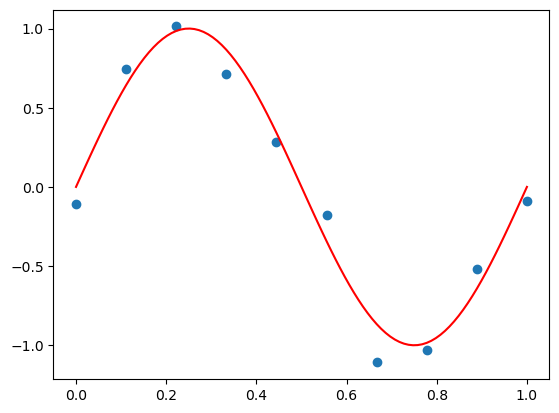

In [19]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# Create data for the example. Note that data is a 2d array!
np.random.seed(123)
x = np.linspace(0, 1, 10).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.1 *  np.random.randn(10, 1)


def plot_data(x, y):
    plt.scatter(x, y)
    xs = np.linspace(0, 1, 100)
    ys = np.sin(2 * np.pi * xs)
    plt.plot(xs, ys, 'r' , label='True function')

plot_data(x, y)

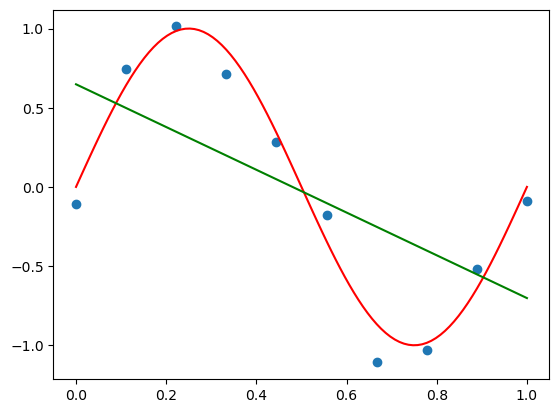

MSE is 0.29089516477320043 


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression() # Create a linear regression model
model.fit(x, y) # Train the model 

preds = model.predict(x) # Make predictions
plot_data(x, y)
plt.plot(x, preds, 'g', label='Linear regression') # Plot the predictions
plt.show()

print(f"MSE is {mean_squared_error(y_pred=preds, y_true=y)} ") # Calculate the mean squared error

# not perfect but the best linear model we can get

# Ejemplo: Ingeniería de Características (Feature engineering)

In [21]:
from sklearn.preprocessing import PolynomialFeatures # have to import this to use it

# Let's visualize what the polynomial features look like with a simple example
simple_x = np.array([1, 2, 3]).reshape(3, 1) # represents input data with 3 samples and 1 feature
print(simple_x)

poly = PolynomialFeatures(degree=3) # Create a polynomial feature object with degree 3
# or equivalently new_x = poly.fit_transform(simple_x)
poly.fit(simple_x) # Fit the polynomial features to the data
new_x = poly.transform(simple_x) # not predict, but transform this time
print("*" * 80)
print(new_x) # col of all 1s represents coordinates in the origin

[[1]
 [2]
 [3]]
********************************************************************************
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


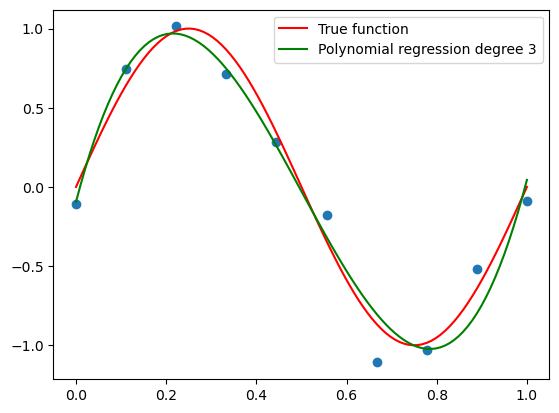

In [ ]:
# Repeating the above code for clarity on our data
poly = PolynomialFeatures(degree=3) # Create a polynomial feature object with degree 3
poly.fit(x)
new_x = poly.transform(x) 

model = LinearRegression() # Create a linear regression model. y = w0 + w1*x + w2*x^2 + w3*x^3
model.fit(new_x, y) # Train the model, with the polynomial features. 

xs = np.linspace(0, 1, 100).reshape(-1, 1) # linespace: generates vector from 0 to 1 with 100 points; reshape: makes it an array (sklearn expects 2d array)
preds = model.predict(poly.transform(xs)) # Make predictions

plot_data(x, y)
plt.plot(xs, preds, 'g', label="Polynomial regression degree 3")
plt.legend()
plt.show()

# Comparando modelos (mal)
Repite el procedimiento anterior para grados 1, 3, 5 y 9. Mide los MSEs... ¿Cuál es el mejor modelo?

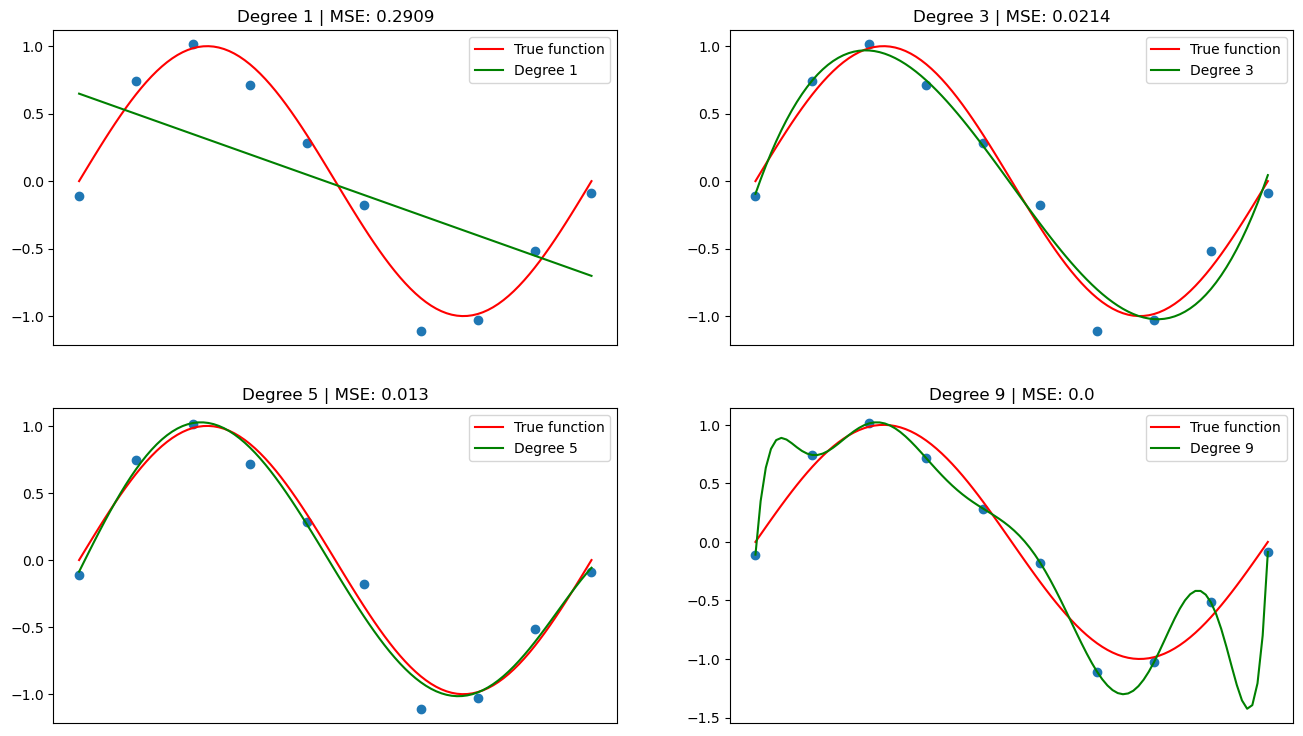

[0.29089516477320043, 0.02144343742648055, 0.012982891604838218, 9.705911082615147e-22]


In [23]:
mses = []
plt.figure(figsize=(16, 9))
xs = np.linspace(0, 1, 100).reshape(-1, 1)
for i, degree in enumerate([1, 3, 5, 9]): # tries different degrees of polynomial
    poly = PolynomialFeatures(degree=degree)
    poly.fit(x)
    new_x = poly.transform(x)

    model = LinearRegression()
    model.fit(new_x, y)

    preds = model.predict(new_x)
    mses.append(mean_squared_error(y_pred=preds, y_true=y)) # Calculate the mean squared error

    plot_preds = model.predict(poly.transform(xs))
    plt.subplot(2, 2, i + 1)
    plot_data(x, y)
    plt.plot(xs, plot_preds, "g", label=f"Degree {degree}")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False # labels along the bottom edge are off
    )
    plt.legend()
    plt.title(f"Degree {degree} | MSE: {np.round(mses[-1], 4)}")
plt.show()
print(mses)

# technically the best model is the one with degree 9, but it is overfitting the data. In this case 5th degree polynomial is the best model.
# we should not use the same data we used to train the model to evaluate it.
# Uderfitting: model is too simple to capture the underlying structure of the data. Too little capacity.
# Overfitting: model is too complex and is capturing the noise in the data (learns from the noise). Too much capacity.

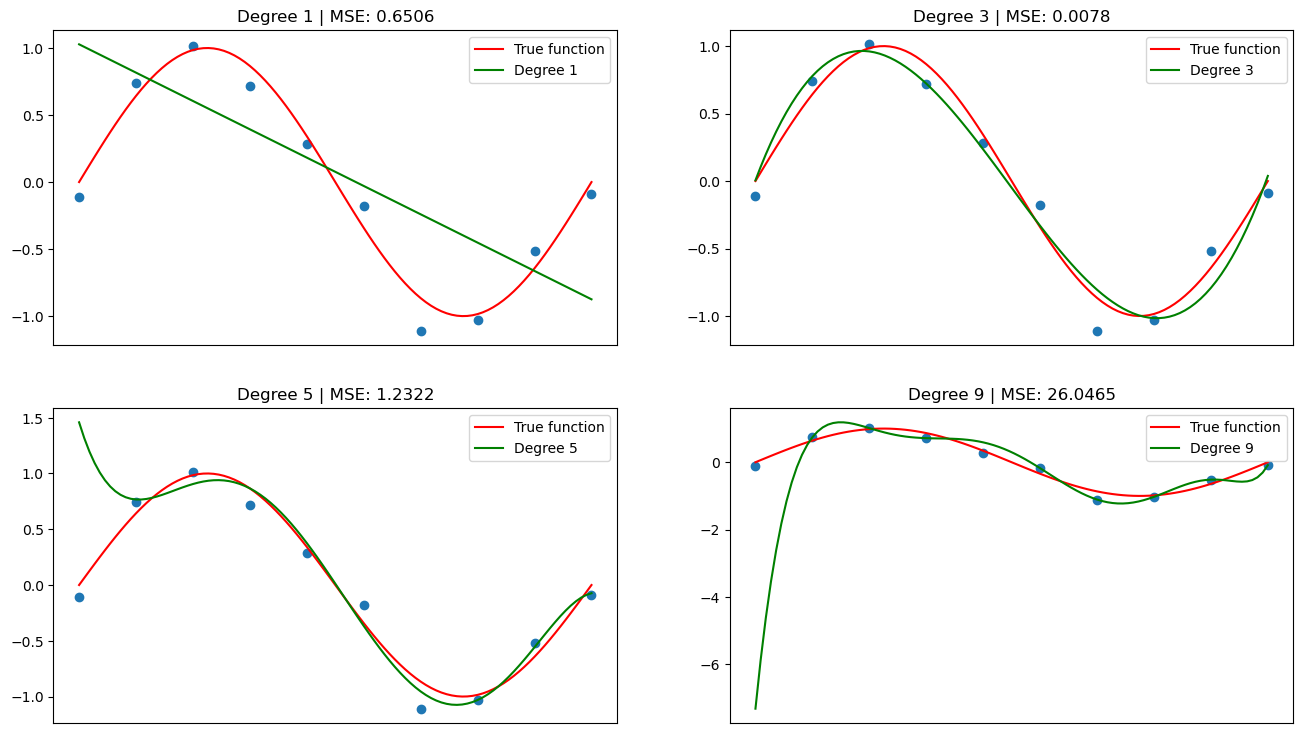

[0.6506258957104581, 0.007752350515039967, 1.2322380710323957, 26.04645727875837]


In [ ]:
from sklearn.model_selection import train_test_split
# Same but with the data split into training and testing sets
# this results in a more realistic evaluation of the model
# now we can see that the 5th degree is the worst model, because it is overfitting the data

mses = []
plt.figure(figsize=(16, 9))
xs = np.linspace(0, 1, 100).reshape(-1, 1)

for i, degree in enumerate([1, 3, 5, 9]): # tries different degrees of polynomial
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
   
    poly = PolynomialFeatures(degree=degree)
    poly.fit(x_train)
    new_x_train = poly.transform(x_train) # Transform the data to polynomial features
    # new_x_test = poly.transform(x_test)
   
    model = LinearRegression()
    model.fit(new_x_train, y_train)

    new_x_test = poly.transform(x_test)
    preds = model.predict(new_x_test)
    mses.append(mean_squared_error(y_pred=preds, y_true=y_test)) # Calculate the mean squared error

    plot_preds = model.predict(poly.transform(xs))
    plt.subplot(2, 2, i + 1)
    plot_data(x, y)
    plt.plot(xs, plot_preds, "g", label=f"Degree {degree}")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False # labels along the bottom edge are off
    )
    plt.legend()
    plt.title(f"Degree {degree} | MSE: {np.round(mses[-1], 4)}")
plt.show()
print(mses)

# technically the best model is the one with degree 9, but it is overfitting the data. In this case 5th degree polynomial is the best model.
# we should not use the same data we used to train the model to evaluate it.
# Uderfitting: model is too simple to capture the underlying structure of the data. Too little capacity.
# Overfitting: model is too complex and is capturing the noise in the data (learns from the noise). Too much capacity.

# Ejemplo: división train-test 
**Divisiones habituales para entrenamiento y test son -> train: 70-90%, test: 10-30%.**

In [29]:
from sklearn.model_selection import train_test_split
# Let's use more data....
np.random.seed(123)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.3 *  np.random.randn(100, 1) # Function + noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) # Split the data into training and test sets. 20% of the data for testing 80% for training

# ... Train on x_train, y_train. Predict on x_test and evaluate on y_test

# Ejemplo: Procedimiento completo con divisiones train-validation-test


{1: 0.2332752427438137, 2: 0.24042027371763344, 3: 0.02877694579192042, 4: 0.02936877272390285, 5: 0.03429258716471447, 10: 0.03707964902799129, 20: 0.8350858096189774, 50: 346.38420494436724}
Best model has degree 3, and a test-MSE of 0.03162135106784672


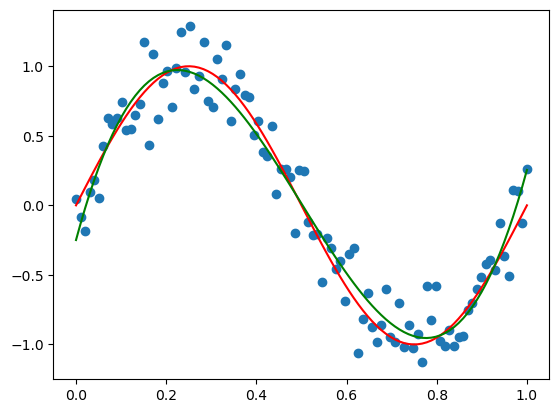

In [30]:
## Diivision of data for test, train and measure the performance of the model
# Let's use more data....
np.random.seed(34)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.2 *  np.random.randn(100, 1)


# Let's do a 70, 30, 30 split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=34) 
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=253) 


def train_and_test(train, test, degree): # gets training and testing data and degree of polynomial
    x_train, y_train = train
    x_test, y_test = test
    poly = PolynomialFeatures(degree=degree)
    new_x_train =poly.fit_transform(x_train) # Transform the data to polynomial features; Fit and transform in one step
    model = LinearRegression()
    model.fit(new_x_train, y_train)
    new_x_test = poly.transform(x_test) # same procedure with the test data, to measure the performance of the model
    preds_test = model.predict(new_x_test)
    return (poly, model), mean_squared_error(y_pred=preds_test, y_true=y_test) # check the performance of the model, with test data

mses = {}
models = []
for degree in [1, 2, 3, 4, 5, 10, 20, 50]: # we try a lot of different degrees
    models_pair, mse = train_and_test((x_train, y_train), (x_val, y_val), degree) # 
    models.append(models_pair)
    mses[degree] = mse


print(mses)
best_degree = min(mses, key=mses.get) # select the best model based on the mean squared error; done with the validation data

# Use all data as possible for the final training!
final_x_train = np.concatenate([x_train, x_val], axis=0) # concatenate the training and validation data for the final training
final_y_train = np.concatenate([y_train, y_val], axis=0)

final_models, final_mse = train_and_test((final_x_train, final_y_train), (x_test, y_test), best_degree) # train the best model with all the data and test it with the test data
# this last call uses all the available data to train the model
poly_model, reg_model = final_models

print(f"Best model has degree {best_degree}, and a test-MSE of {final_mse}")

xs = np.linspace(0, 1, 100).reshape(-1,1)
plot_data(x, y)
plt.plot(xs, reg_model.predict(poly_model.transform(xs)), "g", label="Best model")
plt.show()

# Ejercicio: Pipeline y GridSearch
Un mejor procedimiento para manejar los pasos `PolynomialFeatures` y `LinearRegression` es usar una [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Repite el ejercicio anterior usando una pipeline.

{1: 0.2332752427438137, 2: 0.24042027371763344, 3: 0.02877694579192042, 4: 0.02936877272390285, 5: 0.03429258716471447, 10: 0.03707964902799129, 20: 0.8350858096189774, 50: 346.38420494436724}
Best model has degree 3, and a test-MSE of 0.03162135106784672


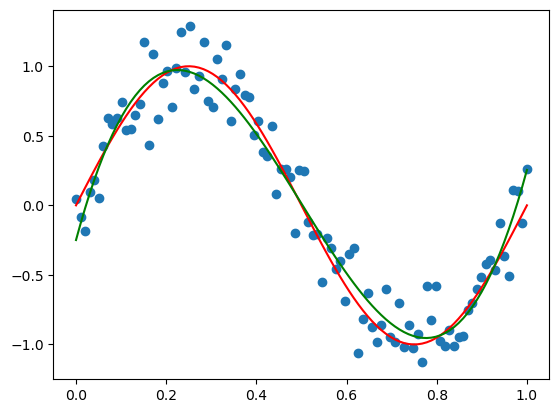

In [ ]:
from sklearn.pipeline import Pipeline
## Diivision of data for test, train and measure the performance of the model
# Let's use more data....
np.random.seed(34)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x) + 0.2 *  np.random.randn(100, 1)


# Let's do a 70, 30, 30 split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=34) 
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=253) 


def train_and_test(train, test, degree): # gets training and testing data and degree of polynomial
    x_train, y_train = train
    x_test, y_test = test
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    # pipeline = Pipeline([("polynomial_features", poly), ("linear_regression", model)])
    new_x_train =poly.fit_transform(x_train) # Transform the data to polynomial features; Fit and transform in one step
    
    model.fit(new_x_train, y_train)
    new_x_test = poly.transform(x_test) # same procedure with the test data, to measure the performance of the model
    preds_test = model.predict(new_x_test)
    return (poly, model), mean_squared_error(y_pred=preds_test, y_true=y_test) # check the performance of the model, with test data

mses = {}
models = []
for degree in [1, 2, 3, 4, 5, 10, 20, 50]: # we try a lot of different degrees
    models_pair, mse = train_and_test((x_train, y_train), (x_val, y_val), degree) # 
    models.append(models_pair)
    mses[degree] = mse


print(mses)
best_degree = min(mses, key=mses.get) # select the best model based on the mean squared error; done with the validation data

# Use all data as possible for the final training!
final_x_train = np.concatenate([x_train, x_val], axis=0) # concatenate the training and validation data for the final training
final_y_train = np.concatenate([y_train, y_val], axis=0)

final_models, final_mse = train_and_test((final_x_train, final_y_train), (x_test, y_test), best_degree) # train the best model with all the data and test it with the test data
# this last call uses all the available data to train the model
poly_model, reg_model = final_models

print(f"Best model has degree {best_degree}, and a test-MSE of {final_mse}")

xs = np.linspace(0, 1, 100).reshape(-1,1)
plot_data(x, y)
plt.plot(xs, reg_model.predict(poly_model.transform(xs)), "g", label="Best model")
plt.show()

# Ejercicio: coeficientes del modelo de regresión lineal 
Lee [la documentación sobre regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) y halla los coeficientes (los valores de **w**) de los diferentes modelos. Crea una tabla como la que se muestra en la diapositiva "Regularización".

# Ejercicio: Regresión Ridge
Repite los ejercicios anteriores usando [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [27]:
from sklearn.linear_model import Ridge

# ...